# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [2]:
data = pd.read_csv('earthquake_data.csv')
data.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [3]:
alerts = data["alert"].unique()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
magnitude,782.0,6.941125,0.445514,6.5000,6.60000,6.8000,7.1000,9.1000
cdi,782.0,4.333760,3.169939,0.0000,0.00000,5.0000,7.0000,9.0000
mmi,782.0,5.964194,1.462724,1.0000,5.00000,6.0000,7.0000,9.0000
tsunami,782.0,0.388747,0.487778,0.0000,0.00000,0.0000,1.0000,1.0000
sig,782.0,870.108696,322.465367,650.0000,691.00000,754.0000,909.7500,2910.0000
nst,782.0,230.250639,250.188177,0.0000,0.00000,140.0000,445.0000,934.0000
dmin,782.0,1.325757,2.218805,0.0000,0.00000,0.0000,1.8630,17.6540
gap,782.0,25.038990,24.225067,0.0000,14.62500,20.0000,30.0000,239.0000
depth,782.0,75.883199,137.277078,2.7000,14.00000,26.2950,49.7500,670.8100
latitude,782.0,3.538100,27.303429,-61.8484,-14.59560,-2.5725,24.6545,71.6312


In [6]:
data.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

# Cleaning the Data

In [7]:
features = ["magnitude", "depth", "cdi", "mmi", "sig"]
target = "alert"
data = data[features + [target]]
data.head(10)

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.000,8,7,768,green
1,6.9,25.000,4,4,735,green
2,7.0,579.000,3,3,755,green
3,7.3,37.000,5,5,833,green
4,6.6,624.464,0,2,670,green
5,7.0,660.000,4,3,755,green
6,6.8,630.379,1,3,711,green
7,6.7,20.000,7,6,797,green
8,6.8,20.000,8,7,1179,yellow
9,7.6,26.943,9,8,1799,yellow


In [8]:
data.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.000,8,7,768,green
1,6.9,25.000,4,4,735,green
2,7.0,579.000,3,3,755,green
3,7.3,37.000,5,5,833,green
4,6.6,624.464,0,2,670,green


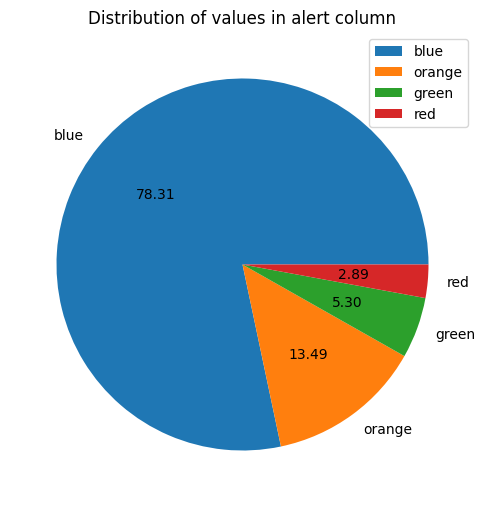

In [9]:
plt.figure(figsize = (6,12))
plt.pie(x = data[target].value_counts(), labels = ['blue','orange','green','red'], autopct = '%.2f')
plt.title("Distribution of values in alert column")
plt.legend()
plt.show()

In [10]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 507
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  415 non-null    float64
 1   depth      415 non-null    float64
 2   cdi        415 non-null    int64  
 3   mmi        415 non-null    int64  
 4   sig        415 non-null    int64  
 5   alert      415 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 22.7+ KB


# Data Preprocessing

In [11]:
data = data.astype({'cdi': 'int8', 'mmi': 'int8', 'sig': 'int8', 'depth': 'int16', 'alert': 'category'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 507
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   magnitude  415 non-null    float64 
 1   depth      415 non-null    int16   
 2   cdi        415 non-null    int8    
 3   mmi        415 non-null    int8    
 4   sig        415 non-null    int8    
 5   alert      415 non-null    category
dtypes: category(1), float64(1), int16(1), int8(3)
memory usage: 9.1 KB


## Balancing the target column

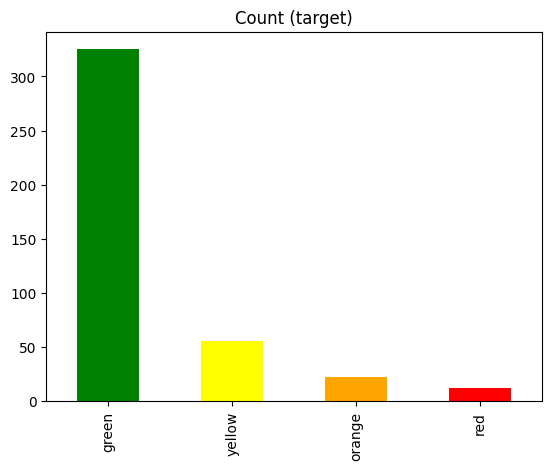

In [12]:
data[target].value_counts().plot(kind='bar', title='Count (target)', color=['green', 'yellow', 'orange', 'red']);

In [13]:
from imblearn.over_sampling import SMOTE

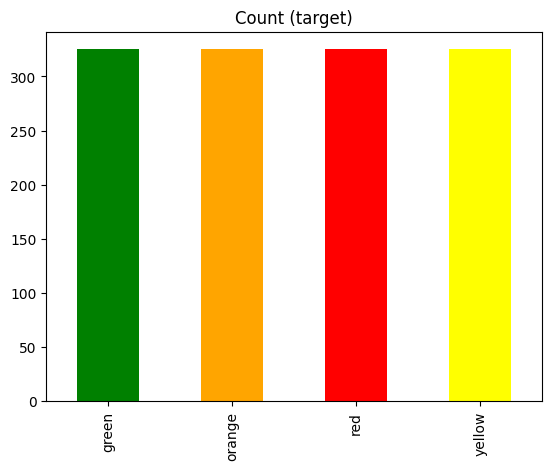

In [14]:
X = data[features]
y = data[target]

X = X.loc[:,~X.columns.duplicated()]

sm = SMOTE(random_state=42)
X_res, y_res= sm.fit_resample(X, y,)

y_res.value_counts().plot(kind='bar', title='Count (target)', color=['green', 'orange', 'red', 'yellow']);

## Splitting & Scaling

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploratory Analysis

[]

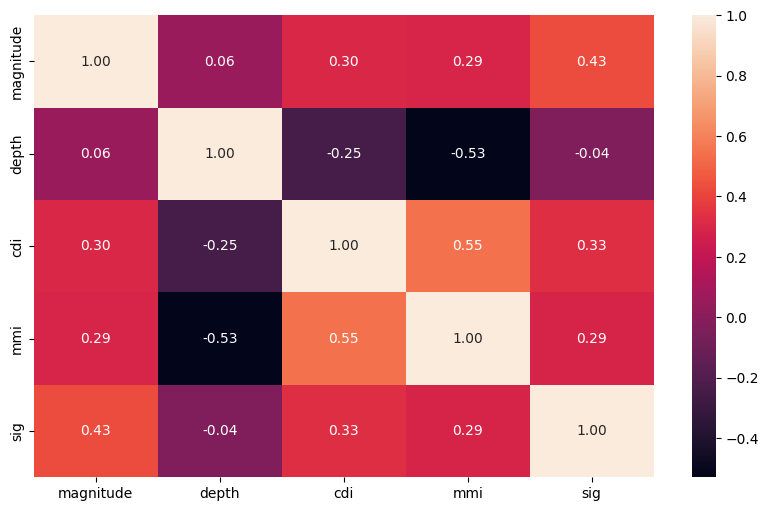

In [19]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.plot()

# Implementing Models

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score

88.07692307692308
              precision    recall  f1-score   support

       green       0.79      0.89      0.84        61
      orange       0.88      0.88      0.88        73
         red       0.94      0.97      0.95        62
      yellow       0.93      0.80      0.86        64

    accuracy                           0.88       260
   macro avg       0.88      0.88      0.88       260
weighted avg       0.88      0.88      0.88       260



[]

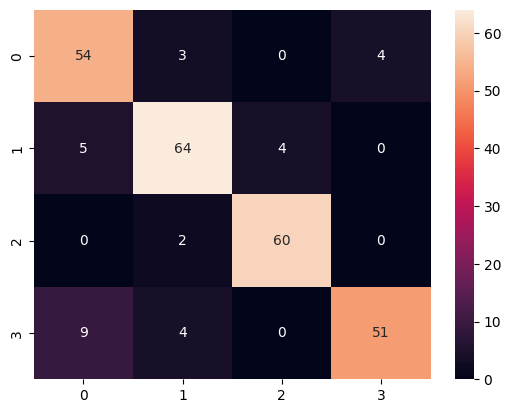

In [23]:
dt_pred = dt.predict(X_test)
print(accuracy_score(dt_pred,y_test)*100)
print(classification_report(dt_pred, y_test))
sns.heatmap(confusion_matrix(dt_pred, y_test), annot = True)
plt.plot()

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

89.23076923076924
              precision    recall  f1-score   support

       green       0.78      0.96      0.86        55
      orange       0.95      0.83      0.88        83
         red       0.92      0.95      0.94        62
      yellow       0.93      0.85      0.89        60

    accuracy                           0.89       260
   macro avg       0.89      0.90      0.89       260
weighted avg       0.90      0.89      0.89       260



C:\Users\prajw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[]

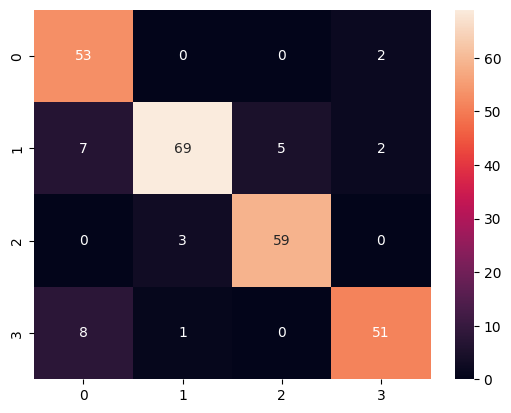

In [26]:
knn_pred = knn.predict(X_test)
print(accuracy_score(knn_pred, y_test)*100)
print(classification_report(knn_pred, y_test))
sns.heatmap(confusion_matrix(knn_pred, y_test), annot = True)
plt.plot()

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

91.15384615384615
              precision    recall  f1-score   support

       green       0.82      0.93      0.87        60
      orange       0.95      0.91      0.93        76
         red       0.95      0.98      0.97        62
      yellow       0.93      0.82      0.87        62

    accuracy                           0.91       260
   macro avg       0.91      0.91      0.91       260
weighted avg       0.91      0.91      0.91       260



[]

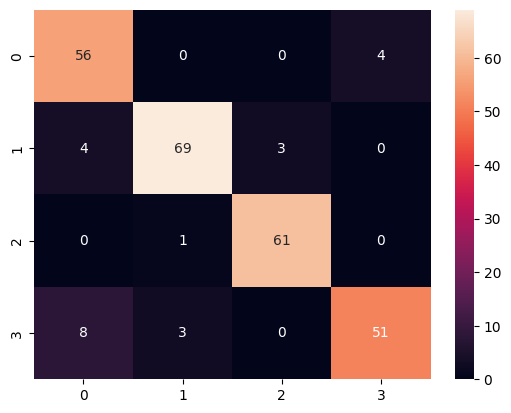

In [29]:
rf_pred = rf.predict(X_test)
print(accuracy_score(rf_pred, y_test)*100)
print(classification_report(rf_pred, y_test))
sns.heatmap(confusion_matrix(rf_pred, y_test), annot = True)
plt.plot()

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

92.6923076923077
              precision    recall  f1-score   support

       green       0.82      0.93      0.87        60
      orange       0.99      0.91      0.95        79
         red       0.97      0.98      0.98        63
      yellow       0.93      0.88      0.90        58

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260



[]

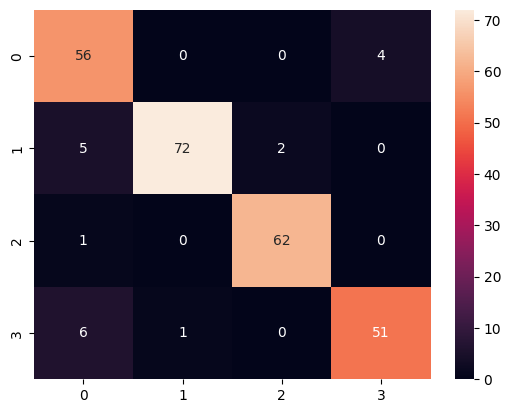

In [32]:
gb_pred = gb.predict(X_test)
print(accuracy_score(gb_pred, y_test)*100)
print(classification_report(gb_pred, y_test))
sns.heatmap(confusion_matrix(gb_pred, y_test), annot = True)
plt.plot()